In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
import dtale

In [106]:
houseprice = pd.read_csv('train.csv', index_col = 0)

In [3]:
houseprice.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [107]:
houseprice['Total_size']= houseprice['BsmtFinSF1']+ houseprice['BsmtFinSF2'] + houseprice['1stFlrSF'] +houseprice['2ndFlrSF']+houseprice['GarageArea']
houseprice["Total_size"]

Id
1       2964
2       2700
3       2880
4       2575
5       3689
        ... 
1456    2107
1457    3526
1458    2867
1459    2396
1460    2652
Name: Total_size, Length: 1460, dtype: int64

In [108]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
houseprice['Recent_yr'] = houseprice.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
houseprice['Age_at_sale']=houseprice.apply(time_to_sale,axis=1)

houseprice["Age_at_sale"]

Id
1        5
2       31
3        6
4       36
5        8
        ..
1456     7
1457    22
1458     4
1459    14
1460    43
Name: Age_at_sale, Length: 1460, dtype: int64

In [109]:
houseprice['Outdoor_Porch_Size']= houseprice['WoodDeckSF']+houseprice['OpenPorchSF']
houseprice.reset_index()

#Removing the outlier
houseprice.drop([523,1298],axis=0,inplace=True)

In [110]:
model2=houseprice[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual", "YrSold",  "LotArea", "BldgType", 'Outdoor_Porch_Size', "Fireplaces", "SalePrice"]]

In [8]:
model2.dtypes

Neighborhood          object
OverallQual            int64
Total_size             int64
KitchenQual           object
Age_at_sale            int64
ExterQual             object
YrSold                 int64
LotArea                int64
BldgType              object
Outdoor_Porch_Size     int64
Fireplaces             int64
SalePrice              int64
dtype: object

In [111]:
model2["SalePrice_log"] = np.log(model2["SalePrice"])

In [112]:
#Dummifying Neighborhood, ExterQual, KitchenQual, and BldgType columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( model2[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
model2 = pd.concat( (model2.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( model2[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
model2 = pd.concat( (model2.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( model2[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
model2 = pd.concat( (model2.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

# dummify BldgType column
from sklearn.preprocessing import OneHotEncoder
BldgType_ohe = OneHotEncoder( drop='first', sparse = False )
BldgType_enc = BldgType_ohe.fit_transform( model2[['BldgType']] )
BldgType_enc = pd.DataFrame( BldgType_enc, columns=BldgType_ohe.get_feature_names(['BldgType']) )
model2 = pd.concat( (model2.drop(["BldgType"], axis=1).reset_index(drop = True), BldgType_enc), axis = 1 )

model2.head()

,OverallQual,Total_size,Age_at_sale,YrSold,LotArea,Outdoor_Porch_Size,Fireplaces,SalePrice,SalePrice_log,Neighborhood_Blueste,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,7,2964,5,2008,8450,61,0,208500,12.247694,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,6,2700,31,2007,9600,298,1,181500,12.109011,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7,2880,6,2008,11250,42,1,223500,12.317167,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7,2575,36,2006,9550,35,1,140000,11.849398,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,8,3689,8,2008,14260,276,1,250000,12.429216,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [113]:
y = model2[["SalePrice_log"]]
X = model2.drop(["SalePrice", "SalePrice_log"], axis=1)
print(X.shape)
print(y.shape)

(1458, 41)
(1458, 1)


In [114]:
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.2  )

In [13]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()

In [115]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
bagging      = ensemble.BaggingRegressor()

In [15]:
# rf_random = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # # Fit the random search model
# rf_random.fit(Xtrain, ytrain)


In [116]:
#Random Forest

randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(Xtrain, ytrain) # fit 
randomForest.score(Xtrain, ytrain) # accuracy

0.9782232406287966

In [17]:
print("The training error of random forest is: %.5f" %(1 - randomForest.score(Xtrain, ytrain)))
print("The test     error of random forest is: %.5f" %(1 - randomForest.score(Xtest, ytest)))

The training error of random forest is: 0.02178
The test     error of random forest is: 0.13711


In [117]:
randomForest.score #parameters used for the random forest

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)>

In [19]:
from sklearn.metrics import mean_squared_error
print("Test error is : {}".format(1- randomForest.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))

Test error is : 0.13711049923776497
Mean Squared Error: 0.023236741706373538
Root Mean Squared Error: 0.15243602496251843


In [22]:
randomForest.oob_score_

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

In [23]:
randomForest.estimators_ #Showing all the trees

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1608637542, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1273642419, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fr

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
y_predicted = randomForest.predict(Xtest)

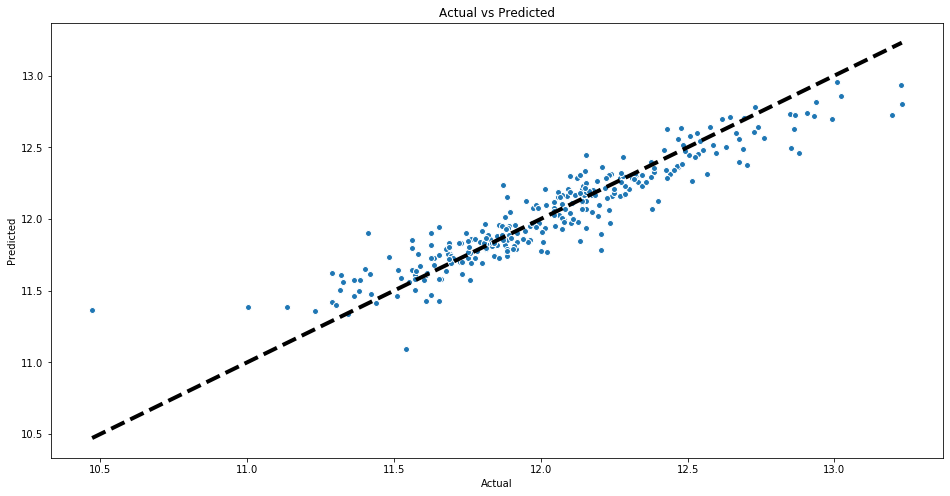

In [25]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(ytest, y_predicted, edgecolors=(1, 1, 1))
ax.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")

plt.savefig('actual_vs_predicted.png')

In [26]:
#Plot feature by importance

feature_importance = list(zip(Xtrain.columns, randomForest.feature_importances_))
dtype = [('feature', 'object'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))

importance = pd.DataFrame({'name':name,'score':score})[:20]
importance

,name,score
0,Total_size,0.152814
1,OverallQual,0.125178
2,Age_at_sale,0.102163
3,LotArea,0.091043
4,Fireplaces,0.073975
5,ExterQual_TA,0.067564
6,Outdoor_Porch_Size,0.065433
7,KitchenQual_TA,0.049928
8,ExterQual_Gd,0.040699
9,KitchenQual_Gd,0.029437


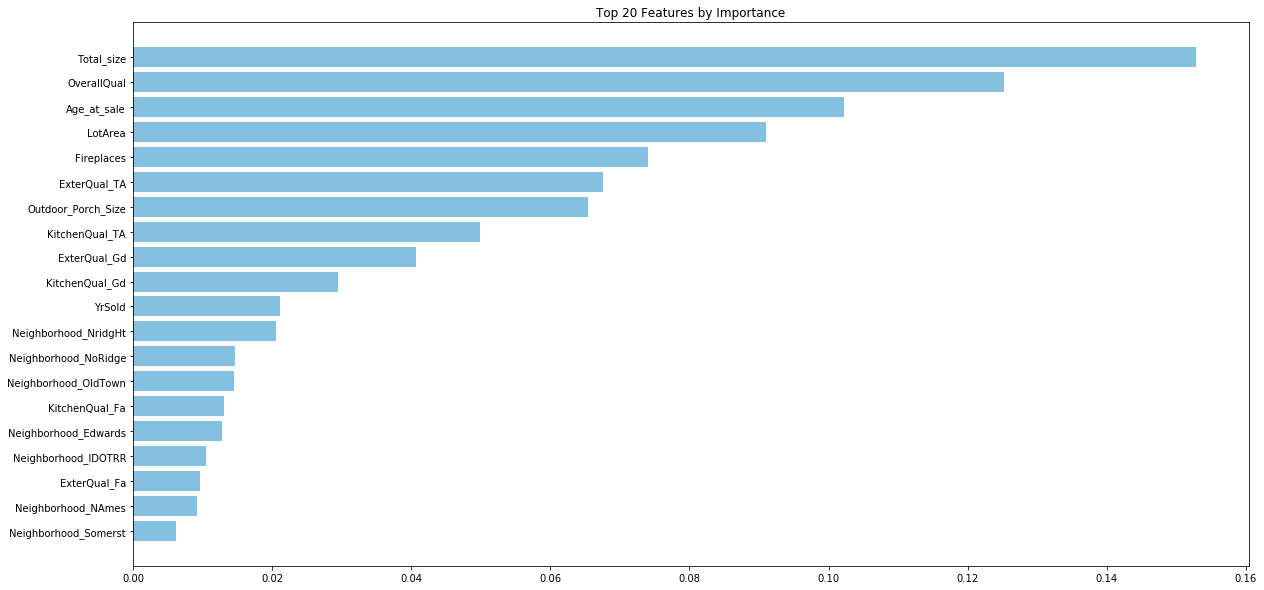

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(importance.name, importance.score, color=(0.2, 0.6, 0.8, 0.6))
plt.gca().invert_yaxis()
ax.set_title('Top 20 Features by Importance')
plt.ylabel('', fontsize=16)

plt.savefig('importance.png')

In [28]:
n_trees_range = range(30, 500, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(Xtrain, ytrain)
    train_error2.append(1 - randomForest.score(Xtrain, ytrain))
    test_error2.append(1 - randomForest.score(Xtest, ytest))
    oob_error.append(1 - randomForest.oob_score_)

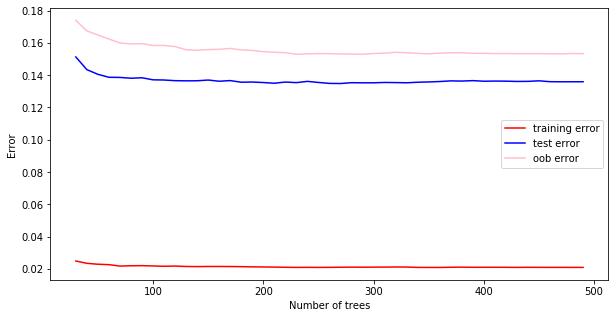

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()

plt.savefig('number of trees.png')

In [34]:
Xtrain.columns

Index(['OverallQual', 'Total_size', 'Age_at_sale', 'YrSold', 'LotArea',
       'Outdoor_Porch_Size', 'Fireplaces', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE'],
      dtype='object')

In [ ]:
# grid_search_forest.best_estimator

In [ ]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(randomForest_model, out_file='tree.dot', 
#                 #feature_names = Xtrain.columns,
#                # class_names = ytrain.columns,
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
#VIF #AIC, BIC

#Sales price boxplit by neighborhood and KitchenQual

In [32]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(Xtrain)
ols = sm.OLS(ytrain, X_add_const)
ans = ols.fit()
print(ans.summary())


                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sat, 29 Feb 2020   Prob (F-statistic):               0.00
Time:                        15:05:10   Log-Likelihood:                 545.26
No. Observations:                1166   AIC:                            -1007.
Df Residuals:                    1124   BIC:                            -794.0
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   19.1007 

In [33]:
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,19.1007,6.910,2.764,0.006,5.542,32.659
OverallQual,0.0841,0.006,13.817,0.000,0.072,0.096
Total_size,0.0001,7.66e-06,15.758,0.000,0.000,0.000
Age_at_sale,-0.0022,0.000,-6.752,0.000,-0.003,-0.002
YrSold,-0.0038,0.003,-1.108,0.268,-0.011,0.003
LotArea,1.435e-06,4.93e-07,2.908,0.004,4.67e-07,2.4e-06
Outdoor_Porch_Size,0.0001,3.65e-05,3.832,0.000,6.82e-05,0.000
Fireplaces,0.0538,0.009,6.000,0.000,0.036,0.071
Neighborhood_Blueste,-0.0603,0.165,-0.365,0.715,-0.384,0.263
Neighborhood_BrDale,-0.2083,0.069,-3.031,0.002,-0.343,-0.073


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

N = add_constant(Xtrain)
VIF= pd.DataFrame([variance_inflation_factor(N.values, i) 
               for i in range(N.shape[1])], index=N.columns)

#VIF.reset_index()
VIF = VIF.rename(columns={'0': 'VIF'}, index={'index': 'Name'})

VIF.reset_index()
#VIF.columns
#VIF.sort_values(by="index[0]")

,index,0
0,const,2.335675e+06
1,OverallQual,3.343581e+00
2,Total_size,2.368099e+00
3,Age_at_sale,2.245474e+00
4,YrSold,1.033173e+00
5,LotArea,1.384528e+00
6,Outdoor_Porch_Size,1.337498e+00
7,Fireplaces,1.671441e+00
8,Neighborhood_Blueste,1.140443e+00
9,Neighborhood_BrDale,2.353744e+00


In [31]:
#GridSearch to find the best score

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = [3]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(Xtrain, ytrain)
base_accuracy = evaluate(base_model, Xtest, ytest)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest, ytest)


In [30]:
#Accuracy score on the test dataset

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(Xtrain, ytrain) # fit 
randomForest.score(Xtest, ytest) # accuracy

0.862889500762235

In [252]:
#Running a model 3 (light list of features)
model3= houseprice[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual", "YrSold"]]

model3.head()

,Neighborhood,OverallQual,Total_size,KitchenQual,Age_at_sale,ExterQual,YrSold
Id,,,,,,,
1,CollgCr,7,2964,Gd,5,Gd,2008
2,Veenker,6,2700,TA,31,TA,2007
3,CollgCr,7,2880,Gd,6,Gd,2008
4,Crawfor,7,2575,Gd,36,TA,2006
5,NoRidge,8,3689,Gd,8,Gd,2008


In [253]:
#Dummifying Neighborhood, ExterQual, and KitchenQual columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( model3[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
model3 = pd.concat( (model3.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( model3[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
model3 = pd.concat( (model3.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )

# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( model3[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
model3 = pd.concat( (model3.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

model3.head()

,OverallQual,Total_size,Age_at_sale,YrSold,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,7,2964,5,2008,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6,2700,31,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,7,2880,6,2008,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7,2575,36,2006,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,8,3689,8,2008,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [254]:
X = model3
np.random.seed(0)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split( X,y, test_size = 0.2  )

In [255]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(Xtrain, ytrain) # fit 
print(randomForest.score(Xtrain, ytrain))
print(randomForest.score(Xtest, ytest)) # accuracy

0.9770318089426496
0.8448633233205056


In [256]:
randomForest.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)>

In [196]:
from sklearn.metrics import mean_squared_error
print("Test error is : {}".format(1- randomForest.score(Xtest, ytest)))
mse=(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Mean Squared Error: {}".format(mse))
rmse = np.sqrt(mean_squared_error(ytest, randomForest.predict(Xtest)))
print("Root Mean Squared Error: {}".format(rmse))

Test error is : 0.13711049923776497
Mean Squared Error: 0.023236741706373538
Root Mean Squared Error: 0.15243602496251843


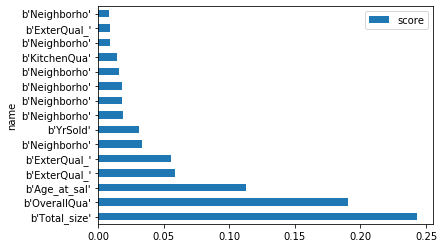

In [257]:
feature_importance = list(zip(Xtrain.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.barh(x='name', y='score')

In [228]:
### Testing on Kaggle Test file

test = pd.read_csv('test.csv', index_col = 0)

In [229]:
test['Total_size']= test['BsmtFinSF1']+ test['BsmtFinSF2'] + test['1stFlrSF'] + test['2ndFlrSF']+ test['GarageArea']
test["Total_size"]

Id
1461    2238.0
1462    2564.0
1463    2902.0
1464    2676.0
1465    2049.0
         ...  
2915    1092.0
2916    1630.0
2917    3024.0
2918    1307.0
2919    3408.0
Name: Total_size, Length: 1459, dtype: float64

In [230]:
def recent_constr(x):
    if(x.YearBuilt < x.YearRemodAdd):
        return x.YearRemodAdd
    else: 
        return x.YearBuilt

#defining intermediate column 2    
test['Recent_yr'] = test.apply(recent_constr,axis=1)

#time to sale helper defined:
def time_to_sale(x):
    return x.YrSold - x.Recent_yr

#new column defined to be used in Train
test['Age_at_sale']=test.apply(time_to_sale,axis=1)

test["Age_at_sale"]

Id
1461    49
1462    52
1463    12
1464    12
1465    18
        ..
2915    36
2916    36
2917    10
2918    14
2919    12
Name: Age_at_sale, Length: 1459, dtype: int64

In [231]:
test['Outdoor_Porch_Size']= test['WoodDeckSF']+ test['OpenPorchSF']

In [232]:
test=test[["Neighborhood", "OverallQual", "Total_size", "KitchenQual", "Age_at_sale", "ExterQual", "YrSold",  "LotArea", "BldgType", 'Outdoor_Porch_Size', "Fireplaces"]]

In [233]:
missingRows = pd.isnull(test).sum(axis=1) > 0
missingCols = pd.isnull(test).sum(axis=0) > 0

In [234]:
test[missingRows]

,Neighborhood,OverallQual,Total_size,KitchenQual,Age_at_sale,ExterQual,YrSold,LotArea,BldgType,Outdoor_Porch_Size,Fireplaces
Id,,,,,,,,,,,
1556,ClearCr,5,1404.0,NaN,60,TA,2010,10632,1Fam,0,0
2121,BrkSide,4,NaN,TA,58,TA,2008,5940,1Fam,0,0
2577,IDOTRR,5,NaN,Gd,8,TA,2007,9060,1Fam,174,0


In [235]:
test.columns[missingCols]

Index(['Total_size', 'KitchenQual'], dtype='object')

In [236]:
#filling missing values of the test.csv

from statistics import mode 
test['Total_size'].fillna(test['Total_size'].mean(), inplace=True)
test['KitchenQual'].fillna(mode(test['KitchenQual']), inplace=True)

In [237]:
#doublechecking if there is a missing value
print(test.isnull().sum())

Neighborhood          0
OverallQual           0
Total_size            0
KitchenQual           0
Age_at_sale           0
ExterQual             0
YrSold                0
LotArea               0
BldgType              0
Outdoor_Porch_Size    0
Fireplaces            0
dtype: int64


In [238]:
test = test.reset_index()
test.Id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [239]:
#Dummifying Neighborhood, ExterQual, KitchenQual, and BldgType columns

from sklearn.preprocessing import OneHotEncoder

#dummify Neighborhood column
Neighborhood_ohe = OneHotEncoder( drop='first', sparse = False )
Neighborhood_enc = Neighborhood_ohe.fit_transform( test[['Neighborhood']] )
Neighborhood_enc = pd.DataFrame( Neighborhood_enc, columns=Neighborhood_ohe.get_feature_names(['Neighborhood']) )
test = pd.concat( (test.drop(["Neighborhood"], axis=1).reset_index(drop = True), Neighborhood_enc), axis = 1 )

#dummify ExterQual Column
ExterQual_ohe = OneHotEncoder( drop='first', sparse = False )
ExterQual_enc = ExterQual_ohe.fit_transform( test[['ExterQual']] )
ExterQual_enc = pd.DataFrame( ExterQual_enc, columns=ExterQual_ohe.get_feature_names(['ExterQual']) )
test = pd.concat( (test.drop(["ExterQual"], axis=1).reset_index(drop = True), ExterQual_enc), axis = 1 )


# dummify KitchenQual column
from sklearn.preprocessing import OneHotEncoder
KitchenQual_ohe = OneHotEncoder( drop='first', sparse = False )
KitchenQual_enc = KitchenQual_ohe.fit_transform( test[['KitchenQual']] )
KitchenQual_enc = pd.DataFrame( KitchenQual_enc, columns=KitchenQual_ohe.get_feature_names(['KitchenQual']) )
test = pd.concat( (test.drop(["KitchenQual"], axis=1).reset_index(drop = True), KitchenQual_enc), axis = 1 )

# dummify BldgType column
from sklearn.preprocessing import OneHotEncoder
BldgType_ohe = OneHotEncoder( drop='first', sparse = False )
BldgType_enc = BldgType_ohe.fit_transform( test[['BldgType']] )
BldgType_enc = pd.DataFrame( BldgType_enc, columns=BldgType_ohe.get_feature_names(['BldgType']) )
test = pd.concat( (test.drop(["BldgType"], axis=1).reset_index(drop = True), BldgType_enc), axis = 1 )

test.head()

,Id,OverallQual,Total_size,Age_at_sale,YrSold,LotArea,Outdoor_Porch_Size,Fireplaces,Neighborhood_Blueste,Neighborhood_BrDale,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,1461,5,2238.0,49,2010,11622,140,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1462,6,2564.0,52,2010,14267,429,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1463,5,2902.0,12,2010,13830,246,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1464,6,2676.0,12,2010,9978,396,1,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1465,8,2049.0,18,2010,5005,82,0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [240]:
#fitting RandomForest model on the model2 train.csv train-split dataset

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()
randomForest.set_params(random_state=42, n_estimators=100, max_features=2)
randomForest.fit(Xtrain, ytrain) # fit with heavy list random Forestmodel
randomForest.score(Xtrain, ytrain)

0.9782232406287966

In [241]:
test = test.set_index("Id")
#test.iloc[:,1:42]
test.head()

,OverallQual,Total_size,Age_at_sale,YrSold,LotArea,Outdoor_Porch_Size,Fireplaces,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
Id,,,,,,,,,,,,,,,,,,,,,
1461,5,2238.0,49,2010,11622,140,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1462,6,2564.0,52,2010,14267,429,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1463,5,2902.0,12,2010,13830,246,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1464,6,2676.0,12,2010,9978,396,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1465,8,2049.0,18,2010,5005,82,0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [242]:
#predicting on test.csv dataset based on the above model
y_pred = randomForest.predict(test)
y_pred

array([11.84218328, 11.95072007, 12.06824129, ..., 12.07011179,
       11.62807083, 12.18896339])

In [243]:
#Outputting exponetials since the predicted values are logged Sales Price

y_pred = np.exp(y_pred)
y_pred

array([138993.61545812, 154928.66623611, 174249.1215745 , ...,
       174575.36017984, 112203.65287569, 196607.25470625])

In [244]:
lst = []
for i in (list(zip(test.index, y_pred))):
    lst.append(i)
lst

[(1461, 138993.61545811896),
 (1462, 154928.66623610575),
 (1463, 174249.12157450366),
 (1464, 186127.24570649912),
 (1465, 184430.86104855294),
 (1466, 172615.52225937176),
 (1467, 161820.47429529225),
 (1468, 167758.1697676205),
 (1469, 186890.34016954977),
 (1470, 133075.5314176595),
 (1471, 202648.7263572883),
 (1472, 109243.44506423414),
 (1473, 113845.81898724256),
 (1474, 149115.31933483813),
 (1475, 123477.30504533502),
 (1476, 360081.0881087697),
 (1477, 237917.64071617238),
 (1478, 289262.1822822108),
 (1479, 277591.0191827341),
 (1480, 387853.76716480695),
 (1481, 283367.87071784574),
 (1482, 212345.0059796846),
 (1483, 173298.54682510518),
 (1484, 168003.08898873022),
 (1485, 206458.99698397476),
 (1486, 202092.90662690395),
 (1487, 297144.9848994453),
 (1488, 232960.19052828953),
 (1489, 214811.97923275118),
 (1490, 229118.13655480187),
 (1491, 201782.81057422052),
 (1492, 116314.63502431315),
 (1493, 173506.27228423316),
 (1494, 301920.86035842466),
 (1495, 299255.1974366

In [245]:
#outputting the results to CSV file
tested = pd.DataFrame(lst)
tested.columns = ["Id", "SalePrice"]
tested.to_csv('tested.csv', index=False)

In [246]:
tested.head()

,Id,SalePrice
0,1461,138993.615458
1,1462,154928.666236
2,1463,174249.121575
3,1464,186127.245706
4,1465,184430.861049


In [251]:
# from sklearn import linear_model
# ols = linear_model.LinearRegression()
# y = np.log(houseprice["SalePrice"])
# x = houseprice['Total_size']
# x

Id
1       2964
2       2700
3       2880
4       2575
5       3689
        ... 
1456    2107
1457    3526
1458    2867
1459    2396
1460    2652
Name: Total_size, Length: 1458, dtype: int64